In [60]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,   
    "font.family": "DejaVu Sans",
    "font.size": 22,
    'figure.autolayout': True,
    'legend.fontsize': 18})

In [61]:
# km/s/Mpc units
h_0 = 67.36

# 1/years units
h_0 = h_0*(1/3.086e+19)*(60*60*24*365)

# density parameters L-CDM
#om_r0 = 31.5e-5
om_r0 = 5.446e-5*1.681
om_m0 = 0.3153 - om_r0
om_l0 = 1 - (om_m0 + om_r0)

om = [om_m0,om_l0,om_r0]

# density parameters variation 1
om_r0_1 = 0
om_m0_1 = 0
om_l0_1 = 1

om_1 = [om_m0_1,om_l0_1,om_r0_1]

# density parameters variation 2
om_r0_2 = 0
om_m0_2 = 1
om_l0_2 = 0

om_2 = [om_m0_2,om_l0_2,om_r0_2]

# density parameters variation 3
om_r0_3 = 1
om_m0_3 = 0
om_l0_3 = 0

om_3 = [om_m0_3,om_l0_3,om_r0_3]

# universe age
u_age = 13.797e9

# we consider t_0 = 0 as initial point and solve for t>0 and t<0 separately
# the complete range will be from t = 0 (universe begining or bigbang) to t = 2.5*universe_age
resolution = 200000
t1 = np.linspace(-5*u_age,0,resolution)
t2 = np.linspace(0,5*u_age,resolution)

# compute the distance between points for each time array
step1 = -(t1[1]-t1[0])
step2 = t2[1]-t2[0]

In [62]:
# runge-kutta definition
def runge_kutta(f,t,y0,step,om):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(len(t)-1):
        k1 = step * f(t[i], y[i], om)
        k2 = step * f(t[i], y[i] + k1/2, om)
        k3 = step * f(t[i], y[i] + k2/2, om)
        k4 = step * f(t[i], y[i] + k3, om)
        y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4)/6
    return y

In [63]:
# function to find nearest point of a function to a given value
def find_nearest(value, domain, image):
    nearest_value = 0
    i = 0
    temp_value = domain[i]
    for i in range(len(image)):
        if(not np.isnan(temp_value)):
            if(np.abs(value - domain[i]) < np.abs(value - temp_value) or temp_value == np.nan):
                temp_value = domain[i]
                nearest_value = image[i]
        else:
            temp_value = domain[i+1]
    return nearest_value

In [64]:
# function to cut nan and negative a values from a arrays
def cut_a(a,t):
    a_new = []
    t_new = []
    for i in range(len(t)):
        if(a[i] >= 0):
            a_new.append(a[i])
            t_new.append(t[i])
    return np.array(a_new), np.array(t_new)

In [65]:
# define the function a' = f(t,a) (L-CDM model) which will be solved
def adot_lcdm(t,a,om):
    return h_0*np.sqrt(om[0]*a**(-1) + om[1]*a**(2) + om[2]*a**(-2))

In [66]:
# boundary condition a(t_0) = 1
a_0 = 1


# equation solutions by runge-kutta method
a_1 = runge_kutta(adot_lcdm,t1,a_0,step1,om)
a_2 = runge_kutta(adot_lcdm,t2,a_0,step2,om)

a_11 = runge_kutta(adot_lcdm,t1,a_0,step1,om_1)
a_21 = runge_kutta(adot_lcdm,t2,a_0,step2,om_1)

a_12 = runge_kutta(adot_lcdm,t1,a_0,step1,om_2)
a_22 = runge_kutta(adot_lcdm,t2,a_0,step2,om_2)

a_13 = runge_kutta(adot_lcdm,t1,a_0,step1,om_3)
a_23 = runge_kutta(adot_lcdm,t2,a_0,step2,om_3)

# merge np arrays into one for time and scale factor
t = np.append((t1),t2[1:])
a_r = np.append(np.flip(a_1),a_2[1:])
a_r_1 = np.append(np.flip(a_11),a_21[1:])
a_r_2 = np.append(np.flip(a_12),a_22[1:])
a_r_3 = np.append(np.flip(a_13),a_23[1:])


# cut nans and negatives from time and scale factor arrays
t_old = t
a, t = cut_a(a_r,t_old)
a_1, t_1 = cut_a(a_r_1,t_old)
a_2, t_2 = cut_a(a_r_2,t_old)
a_3, t_3 = cut_a(a_r_3,t_old)


<ipython-input-65-258d66fc394b>:3: RuntimeWarning: invalid value encountered in sqrt
  return h_0*np.sqrt(om[0]*a**(-1) + om[1]*a**(2) + om[2]*a**(-2))


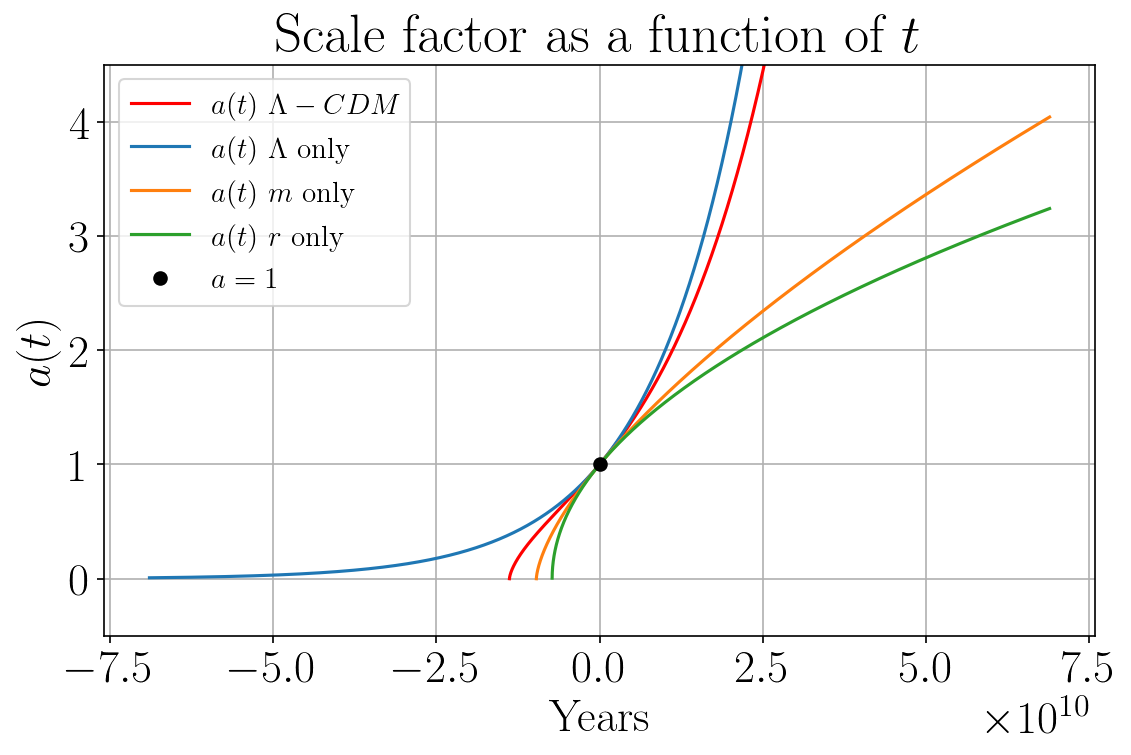

In [67]:
# scale factor plots
fig,ax = plt.subplots(figsize=(8,5.5),dpi=150)
ax.plot(t,a,color="r",label=r"$a(t)$ $\Lambda-CDM$")
ax.plot(t_1,a_1,label=r"$a(t)$ $\Lambda$ only")
ax.plot(t_2,a_2,label=r"$a(t)$ $m$ only")
ax.plot(t_3,a_3,label=r"$a(t)$ $r$ only")

ax.plot(0,1,"ko",label=r"$a=1$")

ax.set_ylim(-0.5,4.5)
#ax.set_xlim(-0.001e10,0.01e10)

ax.grid()
ax.set_xlabel(r"Years")
ax.set_ylabel(r"$a(t)$")
ax.set_title(r"Scale factor as a function of $t$")
plt.legend(fontsize=14)
plt.savefig("13.a(t)var.png")

In [68]:
# shift the start of time arrays to 0
t = t - t[0]
t_1 = t_1 - t_1[0]
t_2 = t_2 - t_2[0]
t_3 = t_3 - t_3[0]


In [69]:
# find z(t) using z = 1/a - 1
z = 1/a - 1
z_1 = 1/a_1 - 1
z_2 = 1/a_2 - 1
z_3 = 1/a_3 - 1


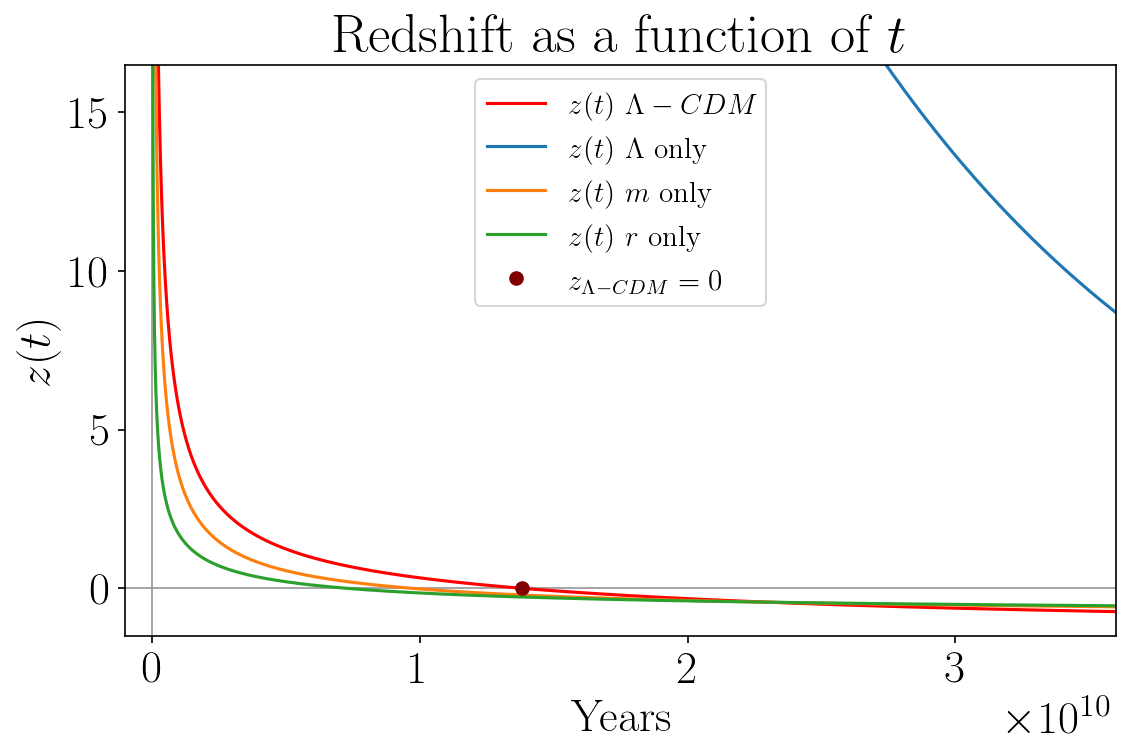

In [70]:
# redshift plots
fig,ax = plt.subplots(figsize=(8,5.5),dpi=150)

ax.plot([0,0],[-5,35],"k-",color="#969696",linewidth=0.8)
ax.plot([-4e10,4e10],[0,0],"k-",color="#969696",linewidth=0.8)

ax.plot(t,z,"r",label=r"$z(t)$  $\Lambda-CDM$")
ax.plot(t_1,z_1,label=r"$z(t)$ $\Lambda$ only")
ax.plot(t_2,z_2,label=r"$z(t)$ $m$ only")
ax.plot(t_3,z_3,label=r"$z(t)$ $r$ only")

#ax.plot([u_age,u_age],[-10,40],"--",color="#4646b3",label=r"$t_0$")
ax.plot(u_age,0,"o",color="maroon",label=r"$z_{\Lambda-CDM}=0$")

ax.set_ylim(-1.5,16.5)
ax.set_xlim(-0.1e10,3.6e10)

#ax.grid()
ax.set_xlabel(r"Years")
ax.set_ylabel(r"$z(t)$")
ax.set_title(r"Redshift as a function of $t$")
plt.legend(fontsize=14)
plt.savefig("14.z(t)var.png")

In [71]:
# compute \dot{a} and H arrays
H = adot_lcdm(t,a,om) / a
H_1 = adot_lcdm(t_1,a_1,om_1) / a_1
H_2 = adot_lcdm(t_2,a_2,om_2) / a_2
H_3 = adot_lcdm(t_3,a_3,om_3) / a_3

H_u = H/(1/3.086e+19)/(60*60*24*365)
H_u_1 = H_1/(1/3.086e+19)/(60*60*24*365)
H_u_2 = H_2/(1/3.086e+19)/(60*60*24*365)
H_u_3 = H_3/(1/3.086e+19)/(60*60*24*365)


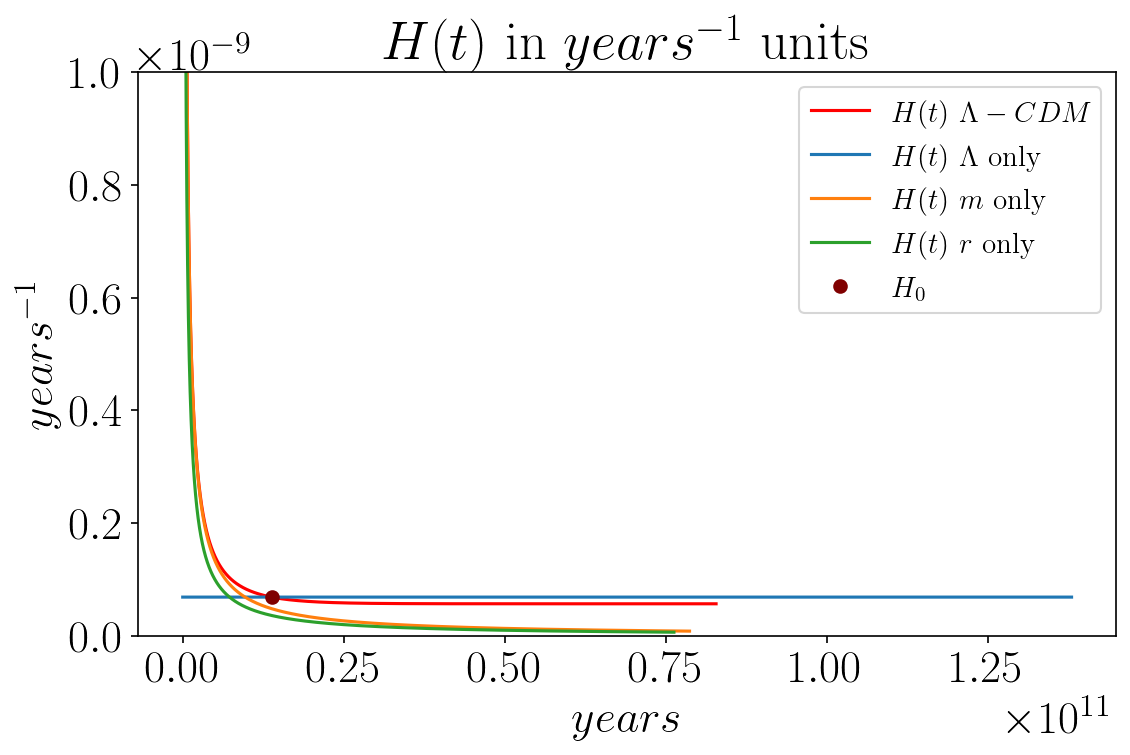

In [72]:
# H plots 1/years units
fig,ax = plt.subplots(figsize=(8,5.5),dpi=150)

ax.plot(t,H,"r",label=r"$H(t)$ $\Lambda-CDM$")
ax.plot(t_1,H_1,label=r"$H(t)$ $\Lambda$ only")
ax.plot(t_2,H_2,label=r"$H(t)$ $m$ only")
ax.plot(t_3,H_3,label=r"$H(t)$ $r$ only")


ax.plot(u_age,h_0,"o",color="maroon",label=r"$H_0$")

ax.set_ylim(-1e-80,1e-9)
#ax.set_xlim(-1.000001,-0.99999)

#ax.grid()
ax.set_xlabel(r"$years$")
ax.set_ylabel(r"$years^{-1}$")
ax.set_title(r"$H(t)$ in $years^{-1}$ units")
plt.legend(fontsize=14)
plt.savefig("15.H(t)yvar.png")

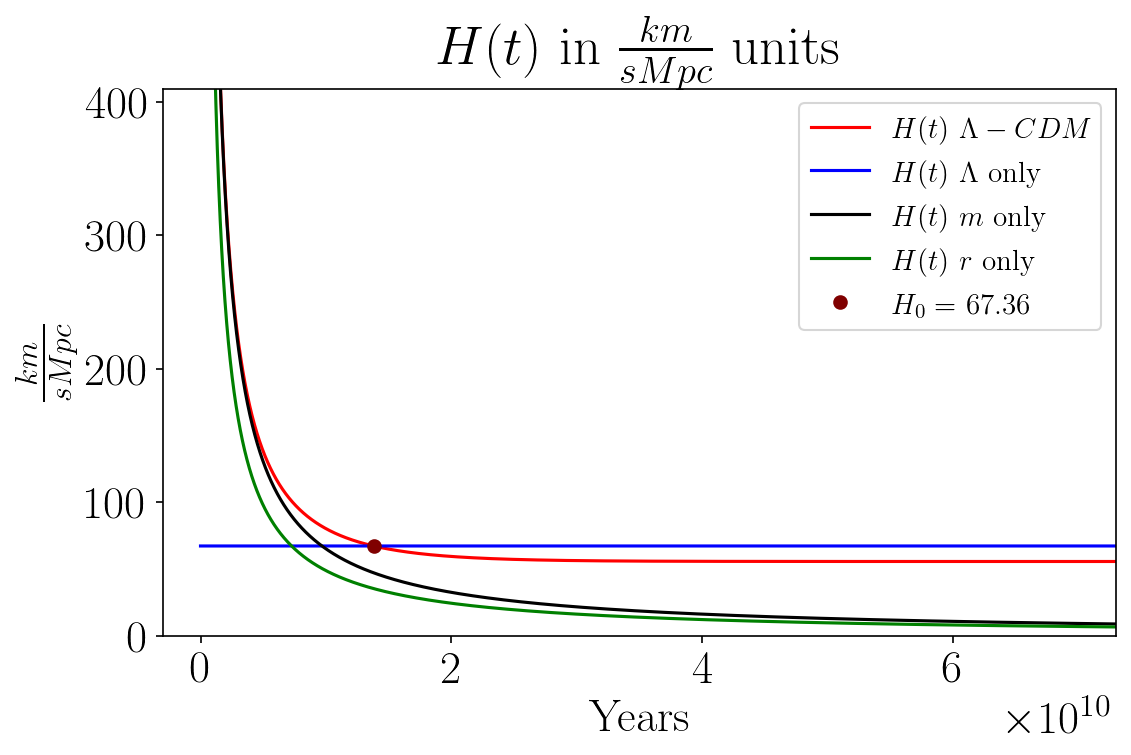

In [73]:
# H plots km/s/Mpc units
fig,ax = plt.subplots(figsize=(8,5.5),dpi=150)

ax.plot(t,H_u,"r",label=r"$H(t)$ $\Lambda-CDM$")
ax.plot(t_1,H_u_1,"b",label=r"$H(t)$ $\Lambda$ only")
ax.plot(t_2,H_u_2,"k",label=r"$H(t)$ $m$ only")
ax.plot(t_3,H_u_3,"g",label=r"$H(t)$ $r$ only")

ax.plot(u_age,h_0/(1/3.086e+19)/(60*60*24*365),"o",color="maroon",label=r"$H_0=$ "+str(round(h_0/(1/3.086e+19)/(60*60*24*365),2)))

ax.set_ylim(0,410)
ax.set_xlim(-0.3e10,7.3e10)

#ax.grid()
ax.set_xlabel(r"Years")
ax.set_ylabel(r"$\frac{km}{s Mpc}$")
ax.set_title(r"$H(t)$ in $\frac{km}{s Mpc}$ units")
plt.legend(fontsize=14)
plt.savefig("16.H(t)kmvar.png")

In [74]:
# more needed constants
G = 6.674e-11
c = 3e8

# compute the critic density evolution
e_cr = 3*c**2*H**2/(8*np.pi*G)/(60*60*24*365)**2

# find e_cr0 in e_cr array
e_cr0 = find_nearest(u_age,t,e_cr)

# compute density parameters evolution
om_m = om_m0*a**(-3)*e_cr0/e_cr
om_g = om_r0*a**(-4)*e_cr0/e_cr
om_l = om_l0*e_cr0/e_cr



In [75]:
# define numerical integration simpson's method 
def integral_simpson(f,t):
    t_new = []
    integral = []
    integral_sum = 0
    for i in range(len(t)-1):
        t_new_point = (t[i] + t[i+1])/2
        t_new.append(t_new_point)
        integral_sum += (t[i+1] - t[i])*(f[i+1] + f[i])/2
        integral.append(integral_sum)
    return np.array(integral), np.array(t_new)

In [76]:
# we define here the arrays needed in the integration considering as integral limits t_0 and t (independent variable)
t_int = []
t_int_1 = []
t_int_2 = []
t_int_3 = []
f_int = []
f_int_1 = []
f_int_2 = []
f_int_3 = []
z_int = []
z_int_1 = []
z_int_2 = []
z_int_3 = []
for i in range(resolution):
    if(a[i] <= 1):
        f_int.append(1/a[i])
        t_int.append(t[i])
        z_int.append(z[i])
    if(a_1[i] <= 1):
        f_int_1.append(1/a_1[i])
        t_int_1.append(t_1[i])
        z_int_1.append(z_1[i])
    if(a_2[i] <= 1):
        f_int_2.append(1/a_2[i])
        t_int_2.append(t_2[i])
        z_int_2.append(z_2[i])
    if(a_3[i] <= 1):
        f_int_3.append(1/a_2[i])
        t_int_3.append(t_3[i])
        z_int_3.append(z_3[i])

# save time arrays length
len_o = np.shape(t_int)
len_1 = np.shape(t_int_1)
len_2 = np.shape(t_int_2)
len_3 = np.shape(t_int_3)

# switch from lists to np arrays
f_int = np.array(np.flip(f_int))
t_int = np.array(np.flip(t_int))
z_int = np.array(np.flip(z_int))
f_int_1 = np.array(np.flip(f_int_1))
t_int_1 = np.array(np.flip(t_int_1))
z_int_1 = np.array(np.flip(z_int_1))
f_int_2 = np.array(np.flip(f_int_2))
t_int_2 = np.array(np.flip(t_int_2))
z_int_2 = np.array(np.flip(z_int_2))
f_int_3 = np.array(np.flip(f_int_3))
t_int_3 = np.array(np.flip(t_int_3))
z_int_3 = np.array(np.flip(z_int_3))

In [77]:
# compute the integrals
d_pt0, t_new = integral_simpson(f_int,t_int)
d_pt0_1, t_new_1 = integral_simpson(f_int_1,t_int_1)
d_pt0_2, t_new_2 = integral_simpson(f_int_2,t_int_2)
d_pt0_3, t_new_3 = integral_simpson(f_int_3,t_int_3)

# we need z(t) array to be the same size as t array, so we can plot d_pt0(z)
z_new = []
z_new_1 = []
z_new_2 = []
z_new_3 = []
for i in range(resolution):
    if(a[i] < 1):
        z_new_point = (z_int[i] + z_int[i+1])/2
        z_new.append(z_new_point)
    if(a_1[i] < 1):
        z_new_point_1 = (z_int_1[i] + z_int_1[i+1])/2
        z_new_1.append(z_new_point_1)
    if(a_2[i] < 1):
        z_new_point_2 = (z_int_2[i] + z_int_2[i+1])/2
        z_new_2.append(z_new_point_2)
    if(a_3[i] < 1):
        z_new_point_3 = (z_int_3[i] + z_int_3[i+1])/2
        z_new_3.append(z_new_point_3)
z_new = np.array(z_new)
z_new_1 = np.array(z_new_1)
z_new_2 = np.array(z_new_2)
z_new_3 = np.array(z_new_3)

# change c units to Mpc/year
c = 3e8*(60*60*24*365)*(1/3.086e+22)

# multiply by c (d_p definition) and change sign (because we integrated from t_0 to t, and it should be from t to t_0)
d_pt0 = -c*d_pt0
d_pt0_1 = -c*d_pt0_1
d_pt0_2 = -c*d_pt0_2
d_pt0_3 = -c*d_pt0_3
d_pte = d_pt0/(1+z_new)
d_pte_1 = d_pt0_1/(1+z_new_1)
d_pte_2 = d_pt0_2/(1+z_new_2)
d_pte_3 = d_pt0_3/(1+z_new_3)

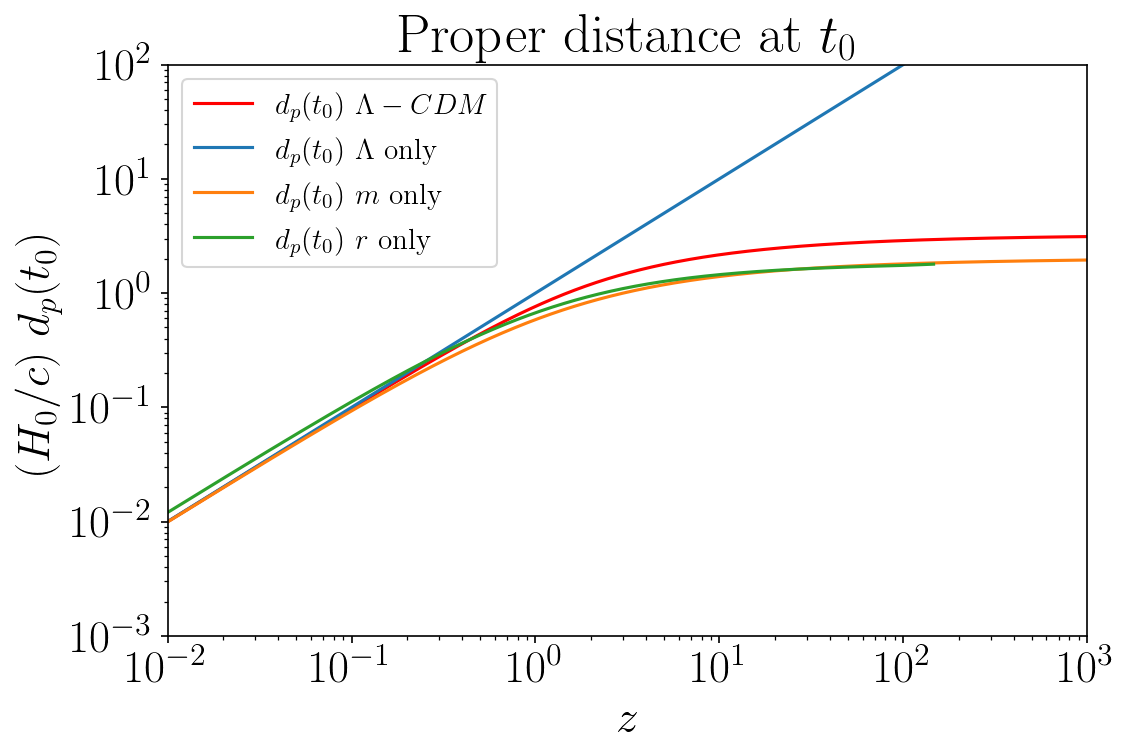

In [78]:
# d_p(t_0) plots
fig,ax = plt.subplots(figsize=(8,5.5),dpi=150)

ax.plot(z_new,h_0/c*d_pt0,"r",label=r"$d_p(t_0)$ $\Lambda-CDM$")
ax.plot(z_new_1,h_0/c*d_pt0_1,label=r"$d_p(t_0)$ $\Lambda$ only")
ax.plot(z_new_2,h_0/c*d_pt0_2,label=r"$d_p(t_0)$ $m$ only")
ax.plot(z_new_3,h_0/c*d_pt0_3,label=r"$d_p(t_0)$ $r$ only")

ax.set_ylim(10e-4,10e1)
ax.set_xlim(10e-3,10e2)

plt.xscale("log")
plt.yscale("log")

#ax.grid()
ax.set_xlabel(r"$z$")
ax.set_ylabel(r"$(H_0/c)$ $d_p(t_0)$")
ax.set_title(r"Proper distance at $t_0$")
plt.legend(fontsize=14)
plt.savefig("17.dp(t0)var.png")

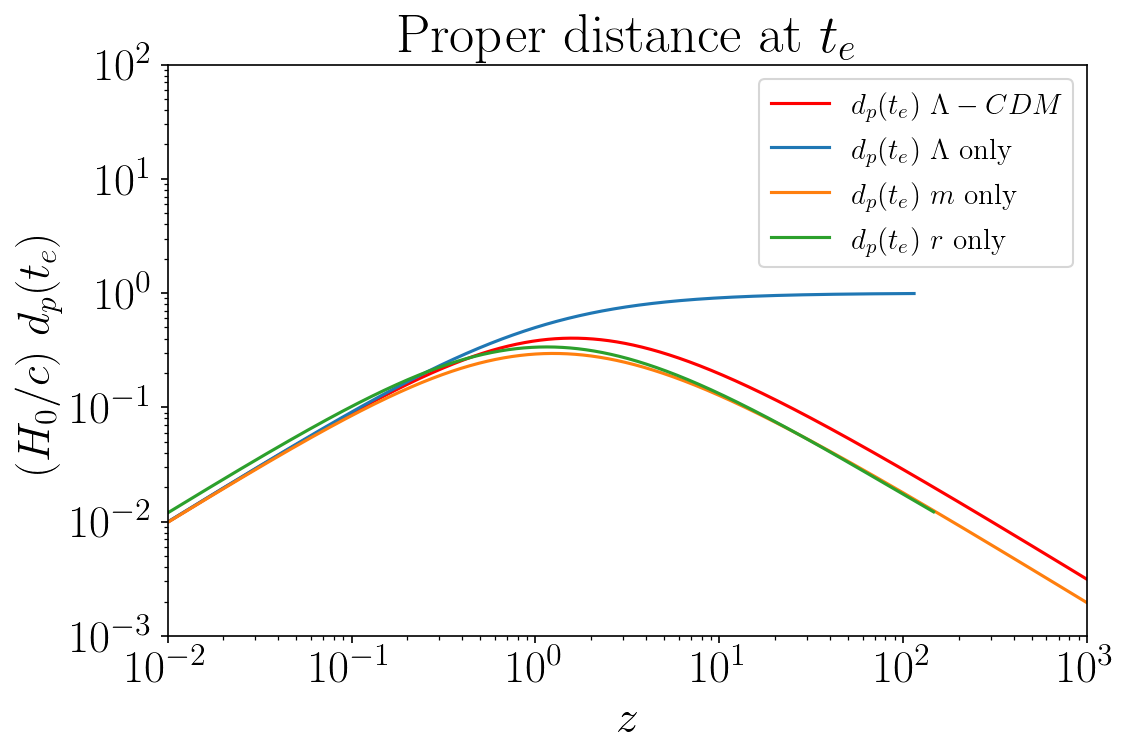

In [79]:
# d_p(t_e) plots
fig,ax = plt.subplots(figsize=(8,5.5),dpi=150)

ax.plot(z_new,h_0/c*d_pte,"r",label=r"$d_p(t_e)$ $\Lambda-CDM$")
ax.plot(z_new_1,h_0/c*d_pte_1,label=r"$d_p(t_e)$ $\Lambda$ only")
ax.plot(z_new_2,h_0/c*d_pte_2,label=r"$d_p(t_e)$ $m$ only")
ax.plot(z_new_3,h_0/c*d_pte_3,label=r"$d_p(t_e)$ $r$ only")

ax.set_ylim(10e-4,10e1)
ax.set_xlim(10e-3,10e2)

plt.xscale("log")
plt.yscale("log")

#ax.grid()
ax.set_xlabel(r"$z$")
ax.set_ylabel(r"$(H_0/c)$ $d_p(t_e)$")
ax.set_title(r"Proper distance at $t_e$")
plt.legend(fontsize=14)
plt.savefig("18.dp(te)var.png")

In [80]:
# compute luminosity and angular diameter distances
d_l = d_pt0*(1 + z_new)
d_l_1 = d_pt0_1*(1 + z_new_1)
d_l_2 = d_pt0_2*(1 + z_new_2)
d_l_3 = d_pt0_3*(1 + z_new_3)

d_ad = d_pt0/(1 + z_new)
d_ad_1 = d_pt0_1/(1 + z_new_1)
d_ad_2 = d_pt0_2/(1 + z_new_2)
d_ad_3 = d_pt0_3/(1 + z_new_3)

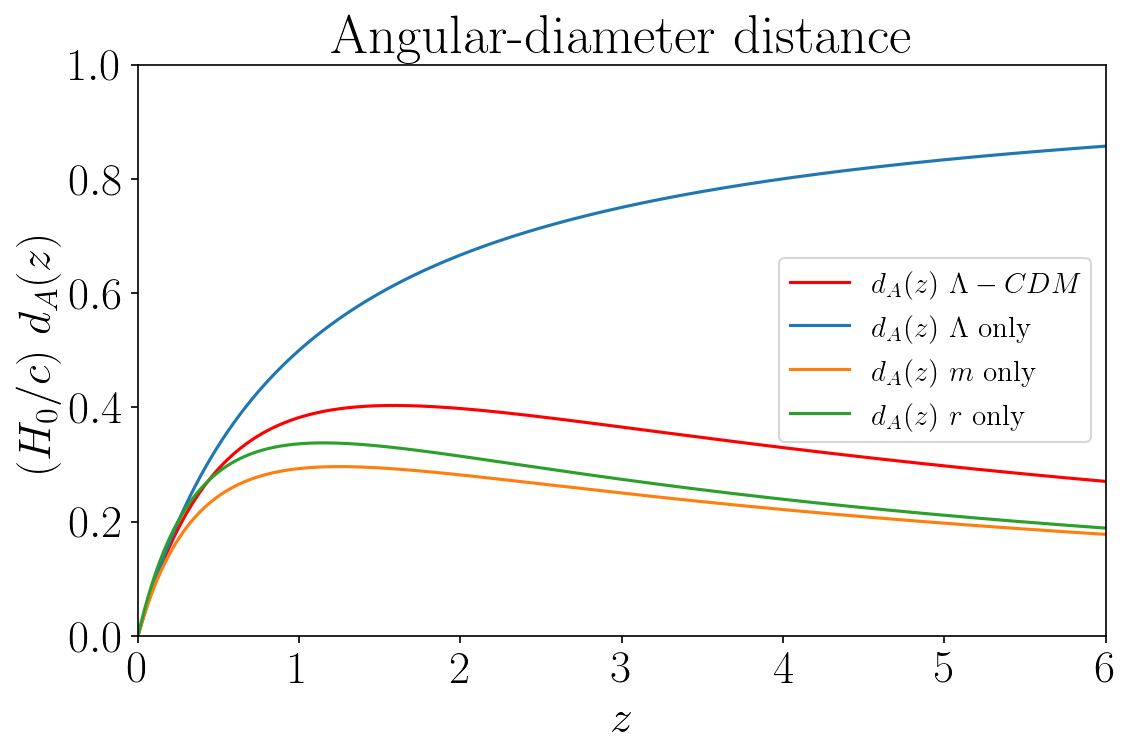

In [81]:
# d_ad plots
fig,ax = plt.subplots(figsize=(8,5.5),dpi=150)

ax.plot(z_new,h_0/c*d_ad,"r",label=r"$d_{A}(z)$ $\Lambda-CDM$")
ax.plot(z_new_1,h_0/c*d_ad_1,label=r"$d_{A}(z)$ $\Lambda$ only")
ax.plot(z_new_2,h_0/c*d_ad_2,label=r"$d_{A}(z)$ $m$ only")
ax.plot(z_new_3,h_0/c*d_ad_3,label=r"$d_{A}(z)$ $r$ only")

ax.set_ylim(0,1)
ax.set_xlim(0,6)

#plt.xscale("log")
#plt.yscale("log")

#ax.grid()
ax.set_xlabel(r"$z$")
ax.set_ylabel(r"$(H_0/c)$ $d_{A}(z)$")
ax.set_title(r"Angular-diameter distance")
plt.legend(fontsize=14)
plt.savefig("19.davar.png")

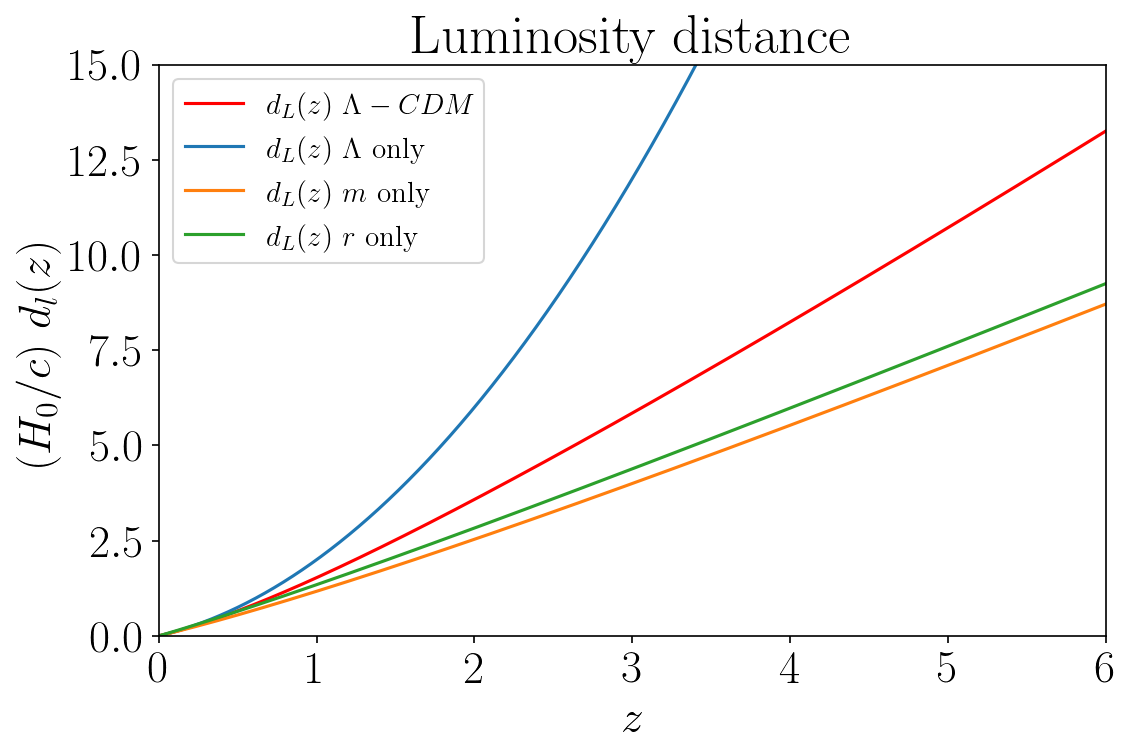

In [82]:
fig,ax = plt.subplots(figsize=(8,5.5),dpi=150)

ax.plot(z_new,h_0/c*d_l,"r",label=r"$d_L(z)$ $\Lambda-CDM$")
ax.plot(z_new_1,h_0/c*d_l_1,label=r"$d_L(z)$ $\Lambda$ only")
ax.plot(z_new_2,h_0/c*d_l_2,label=r"$d_L(z)$ $m$ only")
ax.plot(z_new_3,h_0/c*d_l_3,label=r"$d_L(z)$ $r$ only")

ax.set_ylim(0,15)
ax.set_xlim(0,6)

#plt.xscale("log")
#plt.yscale("log")

#ax.grid()
ax.set_xlabel(r"$z$")
ax.set_ylabel(r"$(H_0/c)$ $d_l(z)$")
ax.set_title(r"Luminosity distance")
plt.legend(fontsize=14)
plt.savefig("20.dlvar.png")

In [83]:
# compute the distance modulus
mu = 5*np.log10(d_l) + 25
mu_1 = 5*np.log10(d_l_1) + 25
mu_2 = 5*np.log10(d_l_2) + 25
mu_3 = 5*np.log10(d_l_3) + 25

In [84]:
# import pandas to read experimental data
import pandas as pd
df_mu = pd.read_csv("mu.csv")
z_exp = np.array(df_mu["z"])
mu_exp = np.array(df_mu["mu"])
error_exp = np.array(df_mu["error"])

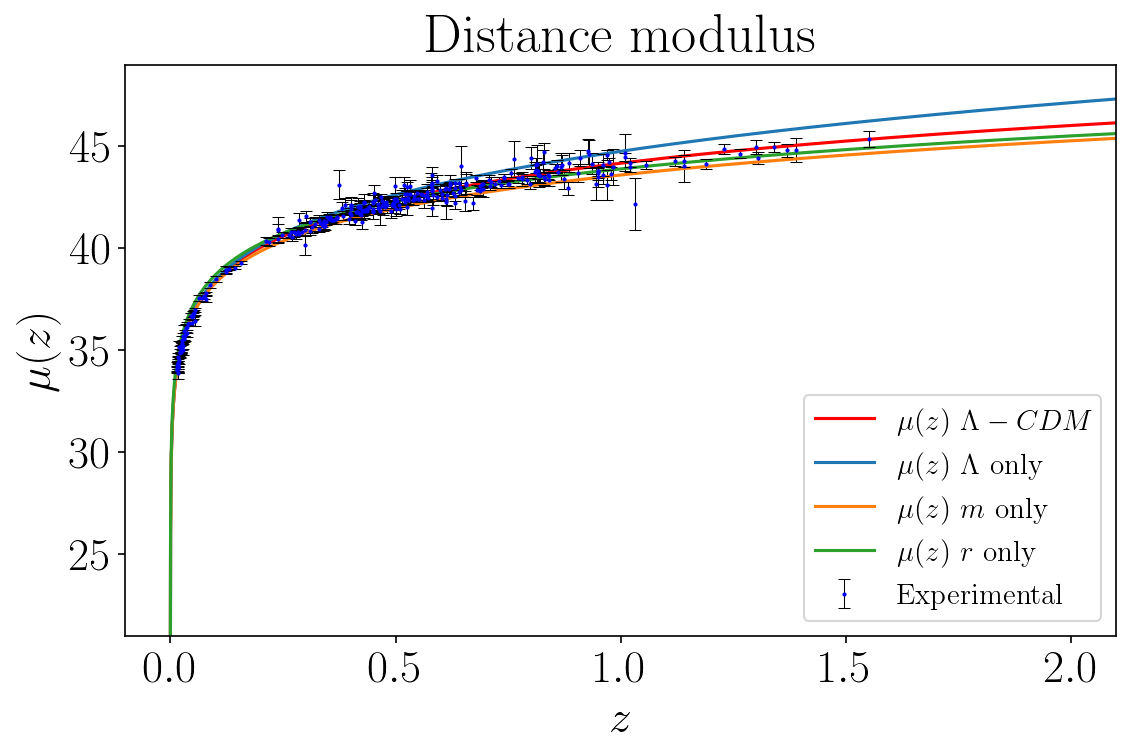

In [85]:
# mu plots
fig,ax = plt.subplots(figsize=(8,5.5),dpi=150)

ax.plot(z_new,mu,"r",label=r"$\mu(z)$ $\Lambda-CDM$")
ax.plot(z_new_1,mu_1,label=r"$\mu(z)$ $\Lambda$ only")
ax.plot(z_new_2,mu_2,label=r"$\mu(z)$ $m$ only")
ax.plot(z_new_3,mu_3,label=r"$\mu(z)$ $r$ only")
ax.errorbar(z_exp,mu_exp,yerr=error_exp,fmt='.',elinewidth=0.5,capthick=0.5,capsize=3,ecolor="k",color="b",ms=2,label=r"Experimental")

ax.set_ylim(21,49)
ax.set_xlim(-0.1,2.1)

#plt.xscale("log")
#plt.yscale("log")

#ax.grid()
ax.set_xlabel(r"$z$")
ax.set_ylabel(r"$\mu(z)$")
ax.set_title(r"Distance modulus")
plt.legend(fontsize=14)
plt.savefig("21.mu_var.png")